In [4]:
from core.generate_points import get_points

svg_file_path = "data/fourier.svg"
pts_file_path = svg_file_path.replace(".svg", ".pts")

points = get_points(pts_file_path) # Complex number array

print(points)

[0.03266114-0.22278982j 0.03433856-0.22417314j 0.03610845-0.22531845j ...
 0.02683646-0.21730836j 0.02957938-0.21991355j 0.03266114-0.22278982j]


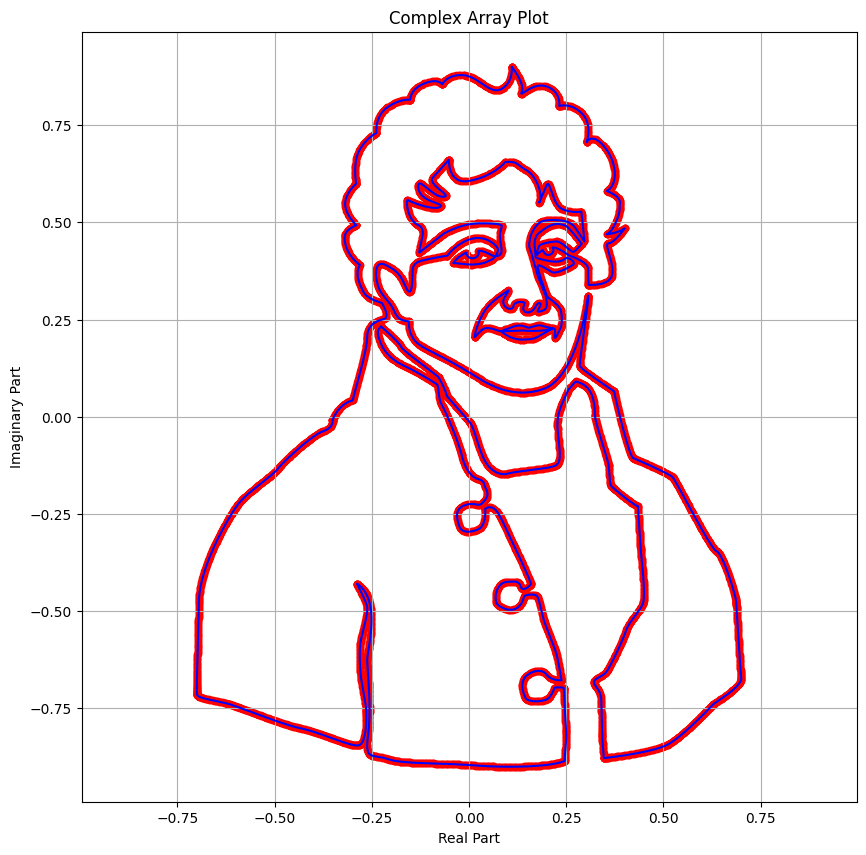

In [11]:
# plot complex array 
import matplotlib.pyplot as plt
import numpy as np

# Extract real and imaginary parts
real_parts = np.real(points)
imag_parts = -np.imag(points)

plt.figure(figsize=(10, 10))
plt.plot(real_parts, imag_parts, 'b-')
plt.scatter(real_parts, imag_parts, c='r', s=20)
plt.title('Complex Array Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axis('equal')
plt.show()


In [25]:
# Attempts to draw Discrete Fourier Transform sequence for the Step Function



Discrete Fourier Transformation of Step Function (defined over $[-0.5, 0.5]$, or $P=1$) is 
$$
s(x) = \sum_{n=0}^{\infty} \frac{1}{\pi n} \sin(\pi n x) \cdot e^{2\pi n i x}
$$
where the coefficients are calculated with DFT formula
$$
c_{n} = \int s(x) \cdot e^{-2\pi n i x} dx
$$
Every complex value could be mapped onto a 2D plane, complex exponential such as $e^{i \theta}$ specifically map onto a circle since 
$$
e^{i \theta} = \cos(\theta) + i \sin(\theta)
$$
which is a unit circle. With the discrete fourier series above, we can project the step function as a sum of complex exponentials with different frequencies. 



In [59]:
# This is current best without questions

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
periods = 1
num_steps = 100 * periods 

# Define the time array
t = np.linspace(-0.5, 0.5, num_steps, endpoint=False)

# Define the step function
step_function = np.where(t < 0, -1, 1)

# Calculate DFT components
ns = np.arange(1, 11, 2)  # Considering first 10 harmonics
signals = np.zeros((len(ns), num_steps), dtype=complex)

for i, n in enumerate(ns):
    # Calculate the nth Fourier coefficient | np.trapz for numerical integration
    c_n = np.trapz(step_function * np.exp(-2j * np.pi * n * t), t)
    
    # Calculate the nth component of the Fourier series
    signals[i] = c_n * np.exp(2j * np.pi * n * t)

# Calculate the reconstructed signal (sum of all components)
reconstructed = np.sum(signals, axis=0)

In [61]:
num_steps = 100 

# Temporal Array
t = np.linspace(-0.5, 0.5, num_steps)

# Step Function 
step_function = np.where(t < 0, -1)  # no 0 in t, skip the dicontinuity point handling at t=0

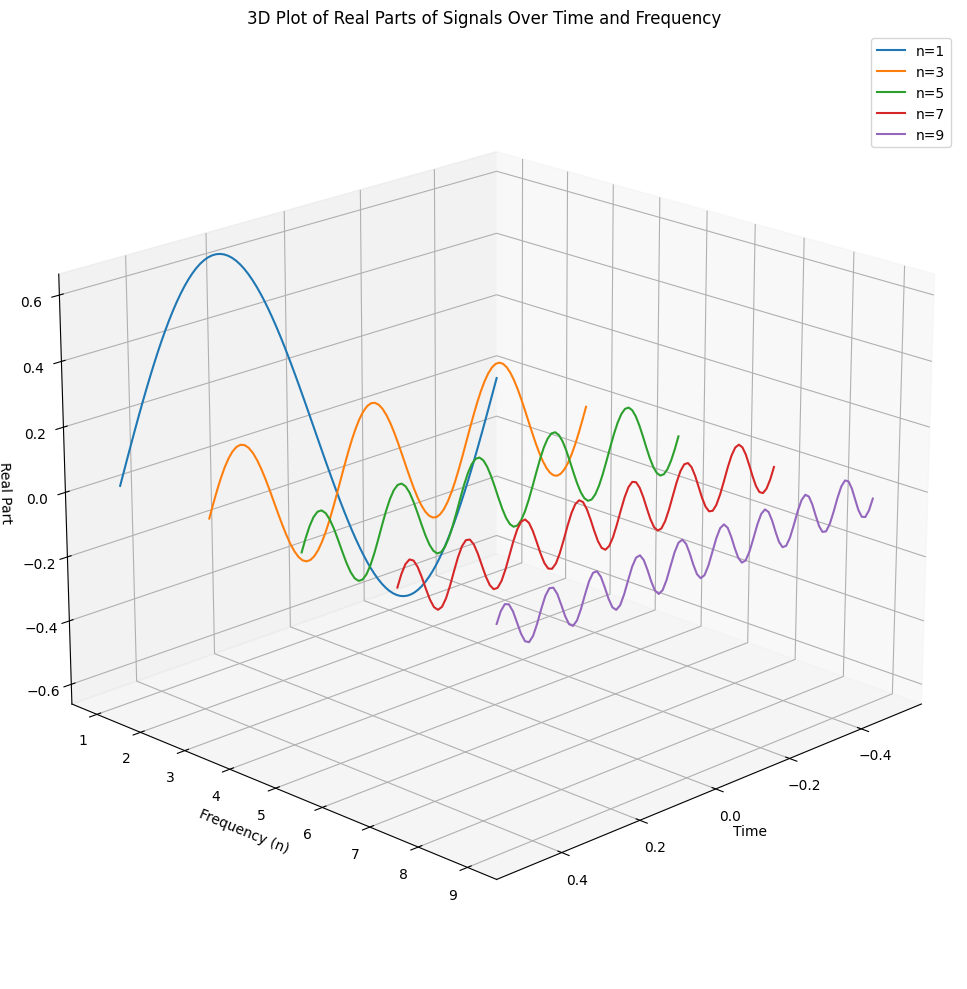

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, signal in enumerate(signals):
    real_parts = np.real(signal)
    freq = ns[i]
    
    # Create an array of the same frequency value for the y-axis
    freq_array = np.full_like(t, freq)
    
    ax.plot(t, freq_array, real_parts, label=f'n={freq}')

ax.set_xlabel('Time')
ax.set_ylabel('Frequency (n)')
ax.set_zlabel('Real Part')
ax.set_title('3D Plot of Real Parts of Signals Over Time and Frequency')

# Add a legend
ax.legend()

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

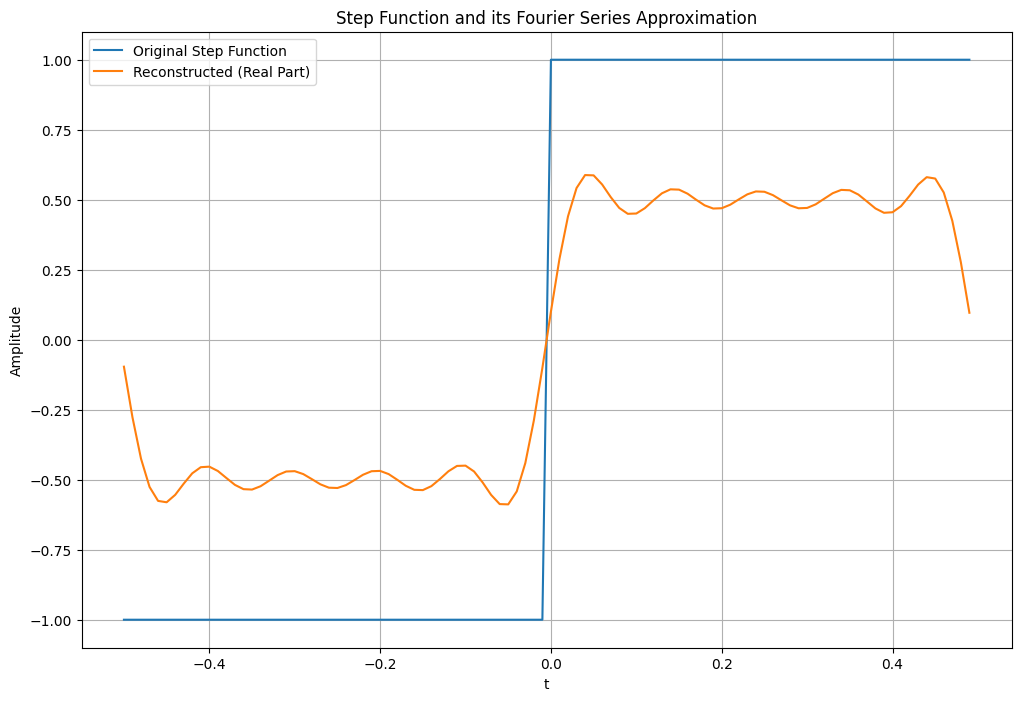

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(t, step_function, label='Original Step Function')
plt.plot(t, reconstructed.real, label='Reconstructed (Real Part)')
plt.legend()
plt.title('Step Function and its Fourier Series Approximation')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

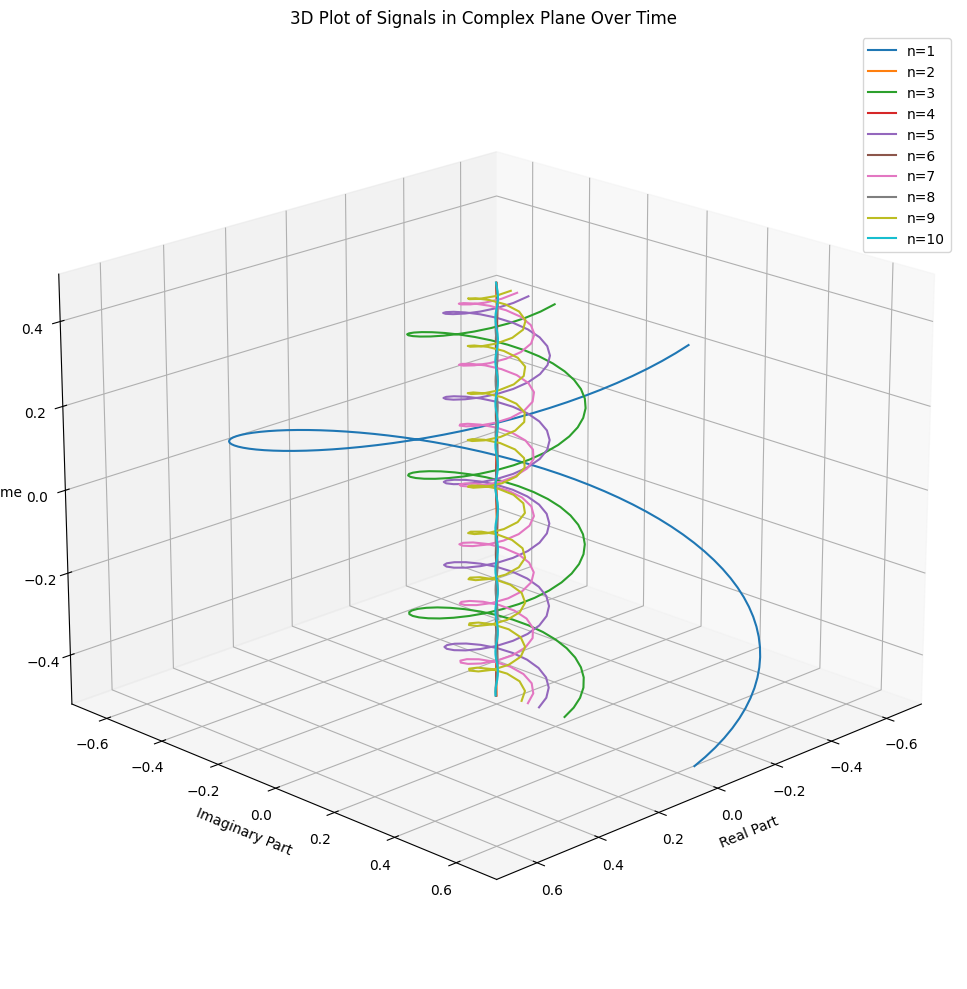

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'signals' is your array of complex-valued signals
# and 't' is your time array

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, signal in enumerate(signals):
    real_parts = np.real(signal)
    imag_parts = np.imag(signal)
    
    ax.plot(real_parts, imag_parts, t, label=f'n={ns[i]}')

ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Time')
ax.set_title('3D Plot of Signals in Complex Plane Over Time')

# Add a legend
ax.legend()

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

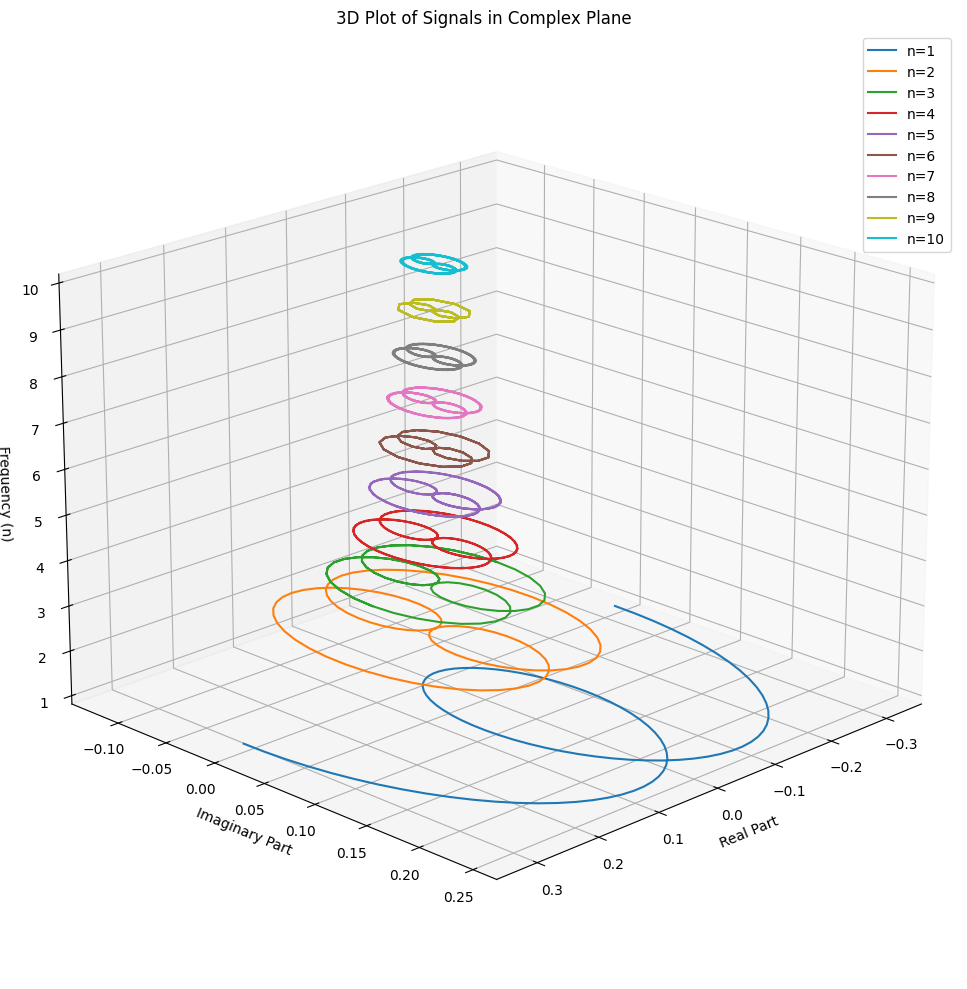

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'signals' is your array of complex-valued signals
# and 'ns' is your array of frequencies

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, signal in enumerate(signals):
    real_parts = np.real(signal)
    imag_parts = np.imag(signal)
    freq = ns[i]
    
    # Create an array of the same frequency value for the z-axis
    freq_array = np.full_like(real_parts, freq)
    
    ax.plot(real_parts, imag_parts, freq_array, label=f'n={freq}')

ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Frequency (n)')
ax.set_title('3D Plot of Signals in Complex Plane')

# Add a legend
ax.legend()

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

In [51]:
signal

array([ 0.31830989+3.89817183e-17j,  0.31750909+2.01782966e-02j,
        0.31511332+4.02145013e-02j,  0.31114233+5.99677682e-02j,
        0.30562886+7.92997317e-02j,  0.29861834+9.80757192e-02j,
        0.29016846+1.16165930e-01j,  0.28034871+1.33446569e-01j,
        0.26923967+1.49800929e-01j,  0.25693237+1.65120410e-01j,
        0.24352744+1.79305455e-01j,  0.2291342 +1.92266420e-01j,
        0.2138697 +2.03924345e-01j,  0.19785767+2.14211628e-01j,
        0.18122742+2.23072600e-01j,  0.16411267+2.30463991e-01j,
        0.14665034+2.36355288e-01j,  0.1289794 +2.40728971e-01j,
        0.11123955+2.43580634e-01j,  0.09357   +2.44918995e-01j,
        0.07610826+2.44765779e-01j,  0.05898888+2.43155487e-01j,
        0.04234229+2.40135049e-01j,  0.0262936 +2.35763372e-01j,
        0.01096153+2.30110766e-01j, -0.00354265+2.23258286e-01j,
       -0.01711611+2.15296960e-01j, -0.02966534+2.06326939e-01j,
       -0.04110698+1.96456562e-01j, -0.05136857+1.85801347e-01j,
       -0.06038913+1.7448

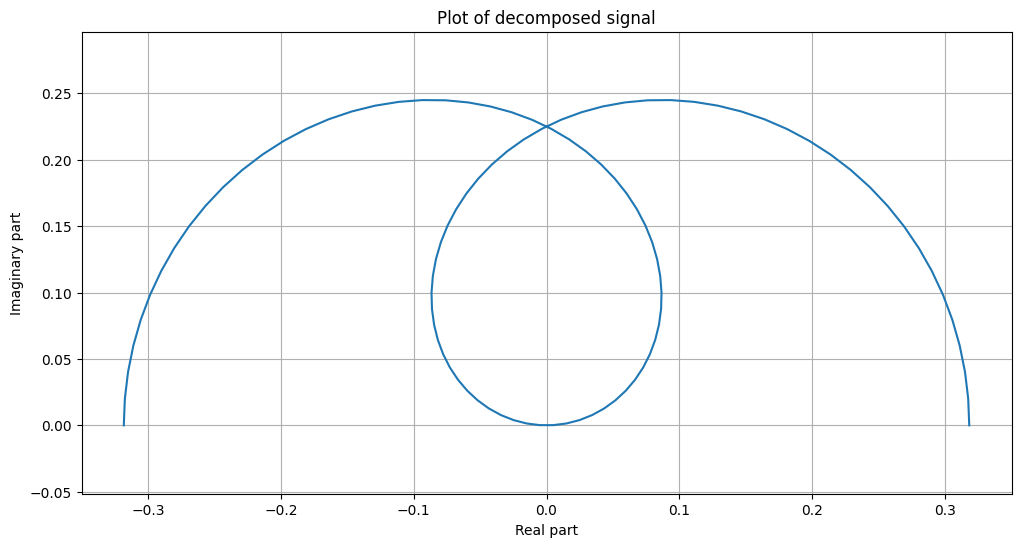

In [50]:
import matplotlib.pyplot as plt

# n = 3
# x = np.linspace(-0.5, 0.5, num_steps)
# signal = np.exp(2 * np.pi * n * 1j * x) 
signal = signals[0]

# Assuming 'signal' and 'x' are already defined from your previous code
# signal = signals[0]

plt.figure(figsize=(12, 6))
plt.plot(np.real(signal), np.imag(signal))
plt.title('Plot of decomposed signal')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pylot as plt 
from matplotlib.animation import FuncAnimation 

# Animation params 
periods = 1
num_steps = 100 * periods

# Circles
ns = np.array([1, 3, 5, 7])


freq = np.array([1, 3, 5, 7])
r = 4 / (freq * np.pi)
K = len(freq)
R = np.max(r)
bounds = np.ceil(R)


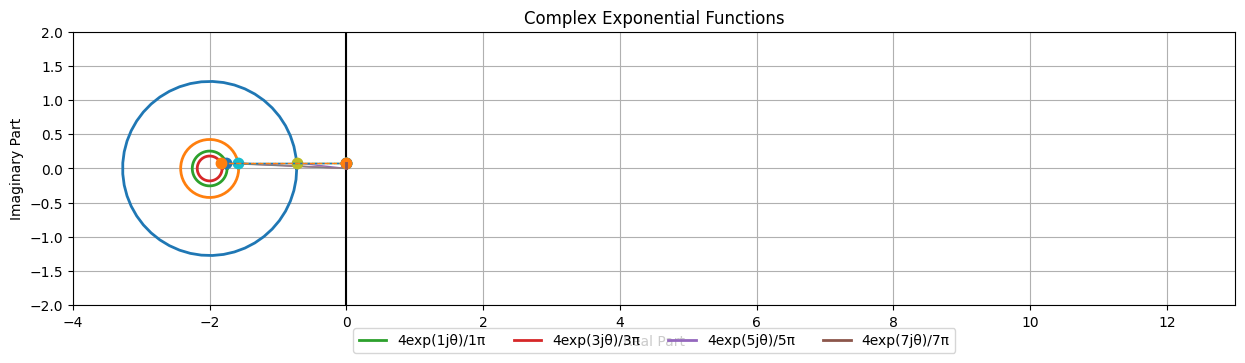

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation params
periods = 2 # Should be 2 pi instead here
num_steps = 100 * periods

# Circles
freq = np.array([1, 3, 5, 7])
r = 4 / (freq * np.pi)
K = len(freq)
R = np.max(r)
bounds = np.ceil(R)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

# Plot circles
t = np.linspace(0, 2*np.pi, 50)
for i in range(K):
    circle = r[i] * np.exp(1j * t) - bounds
    ax.plot(circle.real, circle.imag, linewidth=2)

# Plot y=0 axis
ax.axvline(x=0, color='k')

ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim(-2*bounds, np.ceil(2*np.pi*periods))
ax.set_ylim(-bounds, bounds)
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_title('Complex Exponential Functions')

# Prepare animated graphics objects
radii = [ax.plot([], [], linewidth=1)[0] for _ in range(K)]
lines = [ax.plot([], [], linewidth=1, linestyle='--', marker='.', markersize=15)[0] for _ in range(K)]
curves = [ax.plot([], [], linewidth=2)[0] for _ in range(K)]

# Legend
legend_labels = [f'4exp({f}jθ)/{f}π' for f in freq]
ax.legend(curves, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=K)

# Animation function
xx = np.linspace(0, 2*np.pi*periods, num_steps)
theta = np.zeros(K)
step = (xx[1] - xx[0]) * freq

def animate(frame):
    for k in range(K):
        z = r[k] * np.exp(1j * theta[k])
        
        lines[k].set_data([z.real-bounds, xx[frame]], [z.imag, z.imag])
        radii[k].set_data([0, z.real-bounds], [0, z.imag])
        
        curve_x, curve_y = curves[k].get_data()
        new_x = np.append(curve_x, xx[frame])
        new_y = np.append(curve_y, z.imag)
        curves[k].set_data(new_x, new_y)
    
    theta[:] += step
    return radii + lines + curves

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=20, blit=True)

plt.show()

# # Uncomment the following lines to save the animation as a GIF
# from matplotlib.animation import PillowWriter
# anim.save('complex_fourier_series.gif', writer=PillowWriter(fps=50))

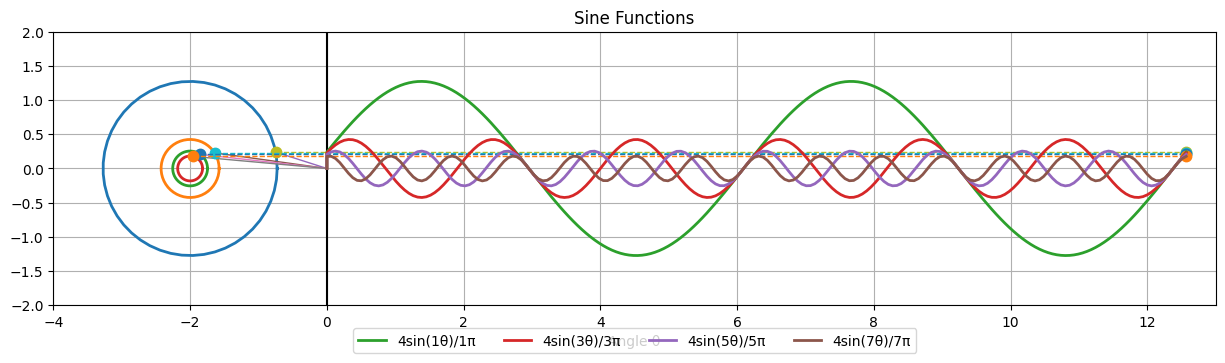

In [14]:
# Sine Wave Animation 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation params
periods = 2
num_steps = 100 * periods

# Circles
freq = np.array([1, 3, 5, 7]) # freq is the 'n' value, representing terms in the Fourier series
r = 4 / (freq * np.pi) # The radius here relates to the equivalency of complex exponential value and its projection to circle in 2D plane
K = len(freq)
R = np.max(r)
bounds = np.ceil(R)

# Circles points (co-centric)
t = np.linspace(0, 2*np.pi, 50)
x = r[:, np.newaxis] * np.cos(t) - bounds
y = r[:, np.newaxis] * np.sin(t)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

# Plot circles
for i in range(K):
    ax.plot(x[i], y[i], linewidth=2)

# Plot y=0 axis
ax.axvline(x=0, color='k')

ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim(-2*bounds, np.ceil(2*np.pi*periods))
ax.set_ylim(-bounds, bounds)
ax.set_xlabel('Angle θ')
ax.set_title('Sine Functions')

# Prepare animated graphics objects
radii = [ax.plot([], [], linewidth=1)[0] for _ in range(K)]
lines = [ax.plot([], [], linewidth=1, linestyle='--', marker='.', markersize=15)[0] for _ in range(K)]
curves = [ax.plot([], [], linewidth=2)[0] for _ in range(K)]

# Legend
legend_labels = [f'4sin({f}θ)/{f}π' for f in freq]
ax.legend(curves, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=K)

# Animation function
xx = np.linspace(0, 2*np.pi*periods, num_steps)
theta = np.zeros(K)
step = (xx[1] - xx[0]) * freq

def animate(frame):
    for k in range(K):
        x = r[k] * np.cos(theta[k])
        y = r[k] * np.sin(theta[k])
        
        lines[k].set_data([x-bounds, xx[frame]], [y, y])
        radii[k].set_data([0, x-bounds], [0, y])
        
        curve_x, curve_y = curves[k].get_data()
        new_x = np.append(curve_x, xx[frame])
        new_y = np.append(curve_y, y)
        curves[k].set_data(new_x, new_y)
    
    theta[:] += step
    return radii + lines + curves

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=20, blit=True)

# plt.show()

# Uncomment the following lines to save the animation as a GIF
from matplotlib.animation import PillowWriter
anim.save('fourier_series.gif', writer=PillowWriter(fps=50))

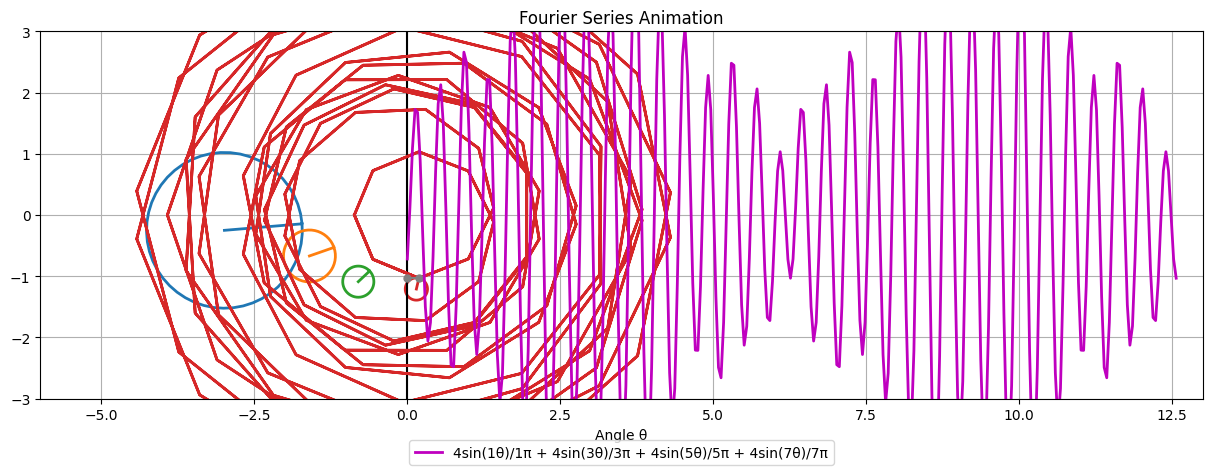

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.transforms import Affine2D

# Animation params
periods = 2
num_steps = 150 * periods

# Circles
freq = np.array([1, 3, 5, 7])
r = 4 / (freq * np.pi)
K = len(freq)
R = np.max(r)
bounds = np.ceil(np.sum(r))

# Circles points (co-centric)
t = np.linspace(0, 2*np.pi, 50)
x = r[:, np.newaxis] * np.cos(t)
y = r[:, np.newaxis] * np.sin(t)

# Add center (so that the radius line is drawn)
x = np.insert(x, 0, 0, axis=1)
y = np.insert(y, 0, 0, axis=1)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

# Plot circles
circles = [ax.plot(x[i], y[i], linewidth=2)[0] for i in range(K)]

# Plot y=0 axis
ax.axvline(x=0, color='k')

ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim(-2*bounds, np.ceil(2*np.pi*periods))
ax.set_ylim(-bounds, bounds)
ax.set_xlabel('Angle θ')
ax.set_title('Fourier Series Animation')

# Prepare animated graphics objects
path, = ax.plot([], [], color=circles[-1].get_color(), linewidth=2)
line, = ax.plot([], [], color='gray', linestyle='-', marker='.', markersize=10)
curve, = ax.plot([], [], color='m', linewidth=2)

# Legend
legend_labels = [f'4sin({f}θ)/{f}π' for f in freq]
ax.legend([curve], [' + '.join(legend_labels)], loc='lower center', bbox_to_anchor=(0.5, -0.2))

# Animation function
xx = np.linspace(0, 2*np.pi*periods, num_steps)
theta = np.zeros(K)
step = (2*np.pi*periods) * freq / num_steps
yy = np.full(num_steps, np.nan)

def animate(frame):
    for k in range(K):
        # Chain of transformations
        transform = Affine2D().translate(-bounds, 0)
        for j in range(k):
            transform = transform.rotate(theta[j]).translate(r[j], 0)
        transform = transform.rotate(theta[k])
        
        # Apply transform
        circles[k].set_transform(transform + ax.transData)
    
    # Update trace line
    pt = transform.transform((r[k], 0))
    path.set_data(*path.get_data())
    path.set_data(np.append(path.get_data()[0], pt[0]), np.append(path.get_data()[1], pt[1]))
    
    # Update curve line
    yy[frame] = pt[1]
    curve.set_data(xx[:frame+1], yy[:frame+1])
    
    # Update connecting line
    line.set_data([pt[0], 0], [pt[1], pt[1]])
    
    # Increment angles
    theta[:] += step
    
    return circles + [path, line, curve]

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=20, blit=True)

# plt.show()

# Uncomment the following lines to save the animation as a GIF
from matplotlib.animation import PillowWriter
anim.save('fourier_series2.gif', writer=PillowWriter(fps=50))

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_4810/321671890.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels([label for label in ax.get_xticks() if label >= 0])
/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_4810/321671890.py:82: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  path.set_data(*pt)


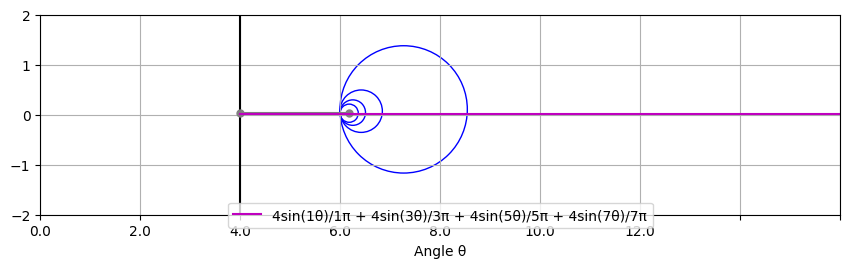

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

# Animation parameters
periods = 2
num_steps = 150 * periods

# Circles
freq = np.array([1, 3, 5, 7])  # Frequency of each sine function (rotation speed)
r = 4 / (freq * np.pi)  # Radii of circles (amplitude of sines)
K = len(freq)  # Number of circles
R = max(r)  # Maximum radius
bounds = int(np.sum(r))  # Offset the circles to the left of origin

# Circle points (co-centric)
t = np.linspace(0, 2 * np.pi, 50)  # NPTS=50
x = np.outer(r, np.cos(t))
y = np.outer(r, np.sin(t))

# Add center (so that the radius line is drawn)
x = np.vstack((np.zeros_like(x[0]), x))
y = np.vstack((np.zeros_like(y[0]), y))

# Circle points in homogeneous form (one slice per circle)
# (size = 4 x NUMPTS x K)
pts = np.dstack((x, y, np.zeros_like(x), np.ones_like(x)))
pts = np.moveaxis(pts, -1, 0)  # Transpose

# Plot: Open wide figure
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot: Circles with radius lines (initially untransformed and all centered on origin), then translate circles to the left
circles = []
for k in range(K):
    circle = patches.Circle((0, 0), r[k], edgecolor='b', facecolor='none')
    ax.add_patch(circle)
    circles.append(circle)

ax.plot([0, 0], [-bounds, bounds], color='k')  # Plot y=0 axis
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim([-2 * bounds, int(2 * np.pi * periods)])
ax.set_ylim([-bounds, bounds])
ax.set_xlabel('Angle θ')
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticklabels([label for label in ax.get_xticks() if label >= 0])

# Plot: Trace path from smallest circle
path, = ax.plot([], [], color=circles[-1].get_edgecolor(), linestyle='-')

# Plot: Connecting line between trace and curve
line, = ax.plot([], [], color=[0.5, 0.5, 0.5], linestyle='-', marker='.', markersize=10)

# Plot: Resulting Fourier series (sum of harmonics)
xx = np.linspace(0, 2 * np.pi * periods, num_steps)
yy = np.full_like(xx, np.nan)
curve, = ax.plot(xx, yy, color='m')

labels = ['4sin({}θ)/{}π'.format(f, f) for f in freq]
ax.legend([curve], [' + '.join(labels)], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Animation
theta = np.zeros(K)  # Current rotation angles for each circle (in radians)
step = (2 * np.pi * periods) * freq / num_steps  # Step sizes for each circle

def update(i):
    global theta
    # Compute and store transformation matrices (translations and rotations)
    tt = np.hstack((theta[0], np.diff(theta)))
    for k in range(K):
        # Apply combined transform on k-th circle
        angle = tt[k]
        pt = np.array([r[k] * np.cos(angle), r[k] * np.sin(angle)])

        # Update k-th circle
        circles[k].center = (pt[0] + bounds, pt[1])

    # Update trace line
    path.set_data(*pt)

    # Update curve line
    yy[:i] = pt[1]
    curve.set_ydata(yy)

    # Update connecting horizontal line
    line.set_data([pt[0] + bounds, 0], [pt[1], pt[1]])

    # Increment angles
    theta += step

ani = FuncAnimation(fig, update, frames=num_steps + 1, interval=20, blit=False)

# plt.show()

from matplotlib.animation import PillowWriter
ani.save('fourier_series2.gif', writer=PillowWriter(fps=50))

IndexError: list index out of range

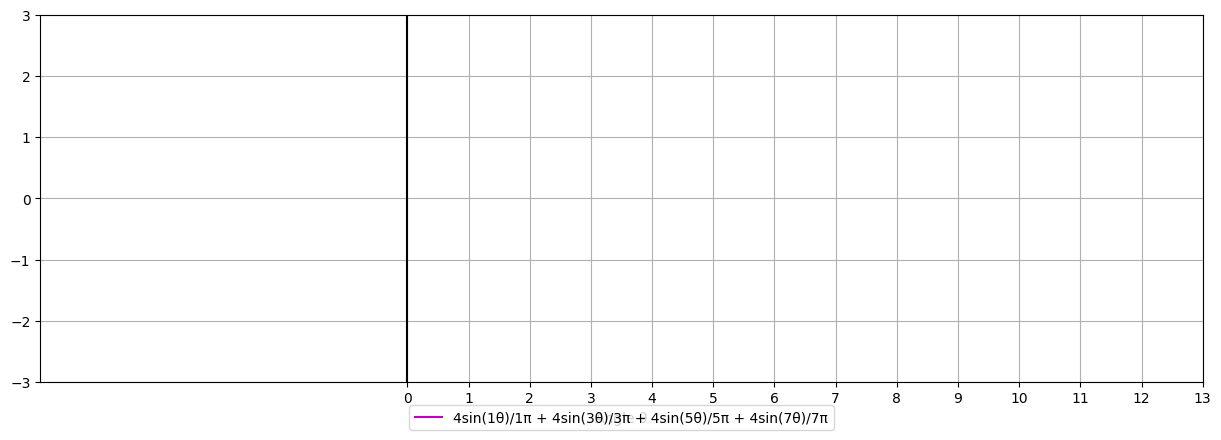

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.transforms import Affine2D

# Animation parameters
periods = 2                # how many full-period rotations to do
num_steps = 150 * periods  # number of animation steps per period

# Circles
freq = np.array([1, 3, 5, 7])  # frequency of each sine function (rotation speed)
r = 4 / (freq * np.pi)         # radii of circles (amplitude of sines)
K = len(freq)                  # number of circles
R = max(r)                     # maximum radius
bounds = np.ceil(np.sum(r))    # offset the circles to left of origin

# Circle points (co-centric)
t = np.linspace(0, 2 * np.pi, 50)  # NPTS=50
x = np.outer(r, np.cos(t))
y = np.outer(r, np.sin(t))

# Add center (so that the radius line is drawn)
x = np.vstack((np.zeros_like(x[0]), x))
y = np.vstack((np.zeros_like(y[0]), y))

# Circle points in homogeneous form (one slice per circle)
# (size = 4 x NUMPTS x K)
pts = np.stack((x, y, np.zeros_like(x), np.ones_like(x)), axis=2)
pts = np.transpose(pts, (1, 0, 2))  # transpose

# Plot: open wide figure
fig, ax = plt.subplots(figsize=(15, 9))
ax.set_xlim(-2 * bounds, np.ceil(2 * np.pi * periods))
ax.set_ylim(-bounds, bounds)
ax.set_aspect('equal')
ax.set_xlabel('Angle \u03B8')
ax.grid(True)
ax.set_xticks(np.arange(0, np.ceil(2 * np.pi * periods) + 1, 1))

# Plot: circles with radius lines (initially untransformed and all centered on origin)
hCircles = [ax.plot(x[:, k], y[:, k], 'b-', lw=2)[0] for k in range(K)]
hTr = ax.transData
ax.plot([0, 0], [-bounds, bounds], 'k-')  # plot y=0 axis

# Plot: trace path from smallest circle
hPath = ax.plot([], [], 'r-', lw=2)[0]

# Plot: connecting line between trace and curve
hLine = ax.plot([], [], 'g-', marker='.', markersize=10)[0]

# Plot: resulting Fourier series (sum of harmonics)
xx = np.linspace(0, 2 * np.pi * periods, num_steps)
yy = np.full_like(xx, np.nan)
hCurve = ax.plot(xx, yy, 'm-')[0]

# Legend
labels = [f'4sin({f}θ)/{f}\u03C0' for f in freq]
ax.legend([hCurve], [' + '.join(labels)], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Animation initialization
def init():
    for circle in hCircles:
        circle.set_data([], [])
    hPath.set_data([], [])
    hLine.set_data([], [])
    hCurve.set_data(xx, yy)
    return hCircles + [hPath, hLine, hCurve]

# Animation update function
theta = np.zeros(K)  # current rotation angles for each circle (in radians)
step = (2 * np.pi * periods) * freq / num_steps  # step sizes for each circle

def update(frame):
    global theta
    tt = np.concatenate(([theta[0]], np.diff(theta)))
    for k in range(K):
        # Compute transformation matrices (translations and rotations)
        Tx = Affine2D().translate(r[k], 0)
        Rz = Affine2D().rotate_around(0, 0, tt[k])
        T = Rz
        for j in range(k):
            T = T.compose(Tx).compose(Rz)

        # Apply combined transform on k-th circle
        pt = T.transform(pts[:, :, k])
        hCircles[k].set_data(pt[:, 0], pt[:, 1])

    # Update trace line
    pt = pt[1]  # take first point from last circle (skipping the center)
    hPath.set_data(np.append(hPath.get_xdata(), pt[0]), np.append(hPath.get_ydata(), pt[1]))

    # Update curve line
    yy = np.roll(yy, 1)
    yy[0] = pt[1]
    hCurve.set_data(xx, yy)

    # Update connecting horizontal line
    hLine.set_data([pt[0] - bounds, 0], [pt[1], pt[1]])

    # Increment angles
    theta += step

    return hCircles + [hPath, hLine, hCurve]

# Create animation
ani = FuncAnimation(fig, update, frames=num_steps + 1, init_func=init, blit=True, interval=50)

# Show plot
# plt.show()

from matplotlib.animation import PillowWriter
ani.save('fourier_series2.gif', writer=PillowWriter(fps=50))